## Coding Exercise #0403

### 1. Compare clustering algorithms:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
%matplotlib inline

#### 1.1. Generate simulated data and visualize:

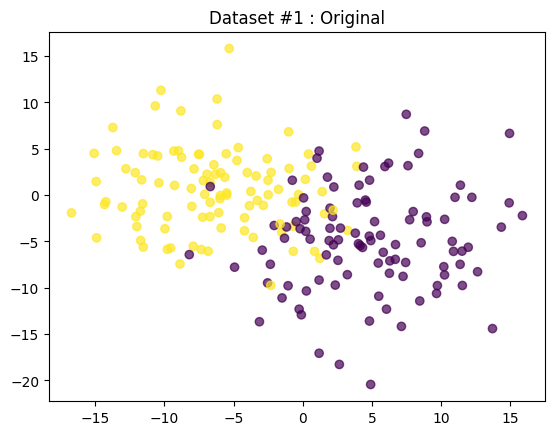

In [2]:
# Dataset #1.
X1, label1 = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std = 5, random_state=123)
plt.scatter(X1[:,0],X1[:,1], c= label1, alpha=0.7 )
plt.title('Dataset #1 : Original')
plt.show()

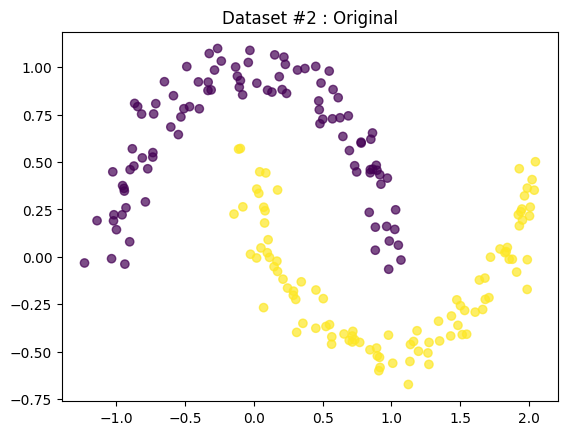

In [3]:
# Dataset #2.
X2, label2 = make_moons(n_samples=200, noise=0.08, random_state=123)
plt.scatter(X2[:,0],X2[:,1], c= label2, alpha=0.7 )
plt.title('Dataset #2 : Original')
plt.show()

#### 1.2. Apply k-means clustering and visualize:

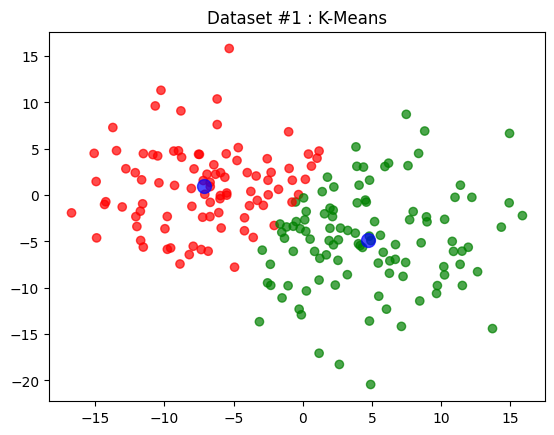

In [21]:
# Dataset #1 and two clusters.
kmeans = KMeans(n_clusters=2,random_state=123)                 # kmeans object for 2 clusters. radom_state=123 means deterministic initialization.
kmeans.fit(X1)                                                 # Unsupervised learning => Only X1.    
centroids = kmeans.cluster_centers_                            # Get the cluster centers.
myColors = {0:'red',1:'green'}                                 # Define a color palette: 0~1.
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 ) 
plt.scatter(centroids[:,0],centroids[:,1], c='blue', s=100, alpha=0.7)    # Show the cluster centers.   
plt.title('Dataset #1 : K-Means')
plt.show()

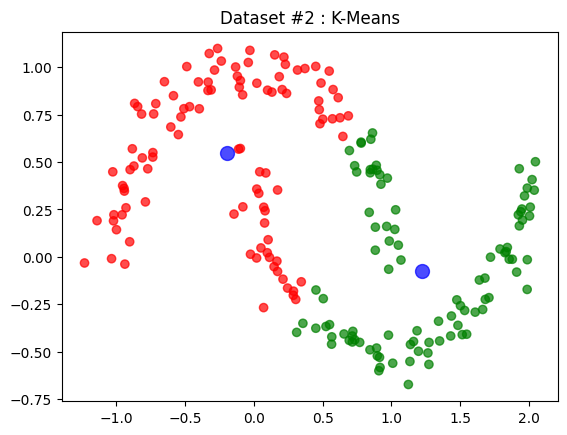

In [20]:
# Dataset #2 and two clusters.
kmeans = KMeans(n_clusters=2,random_state=123)                 # kmeans object for 2 clusters. radom_state=123 means deterministic initialization.                
kmeans.fit(X2)                                                 # Unsupervised learning => Only X1.    
centroids = kmeans.cluster_centers_                            # Get the cluster centers.
myColors = {0:'red',1:'green'}                                 # Define a color palette: 0~1.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7 )
plt.scatter(centroids[:,0],centroids[:,1], c='blue', s=100, alpha=0.7)    # Show the cluster centers.
plt.title('Dataset #2 : K-Means')
plt.show()

#### 1.3. Apply agglomerative clustering and visualize:

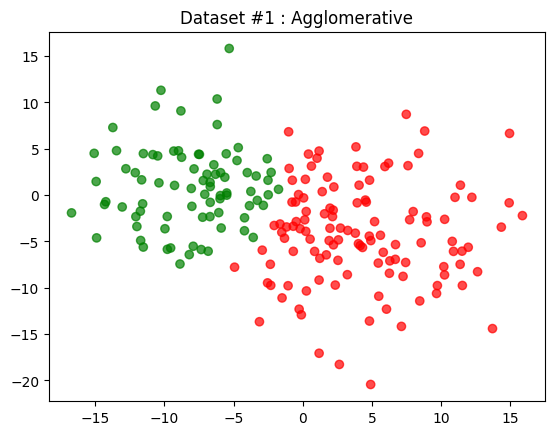

In [5]:
# Q: Apply and fit AgglomerativeClustering to Dataset #1 (two clusters).
agglo = AgglomerativeClustering(n_clusters=2)                  # Agglomerative object for 2 clusters.
agglo.fit(X1)                                                  # Unsupervised learning => Only X1.
myColors = {0:'red',1:'green'}                                 # Define a color palette: 0~1.
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #1 : Agglomerative')
plt.show()

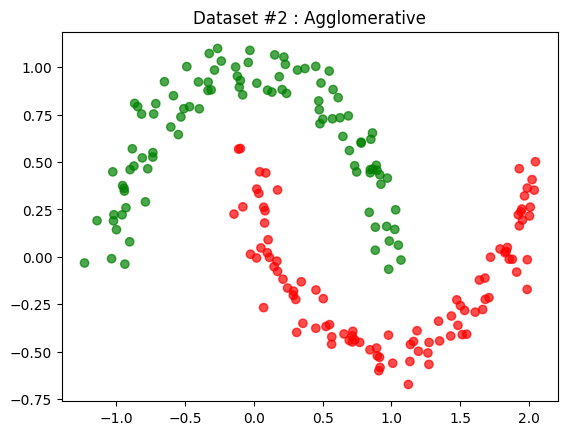

In [7]:
# Q: Apply and fit AgglomerativeClustering to Dataset #2 (two clusters).
agglo = AgglomerativeClustering(n_clusters=2,linkage='single') # Agglomerative object for 2 clusters.
agglo.fit(X2)                                                  # Unsupervised learning => Only X1.
myColors = {0:'red',1:'green'}                                 # Define a color palette: 0~1.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : Agglomerative')
plt.show()

#### 1.4. Apply hierarchical clustering and visualize: 

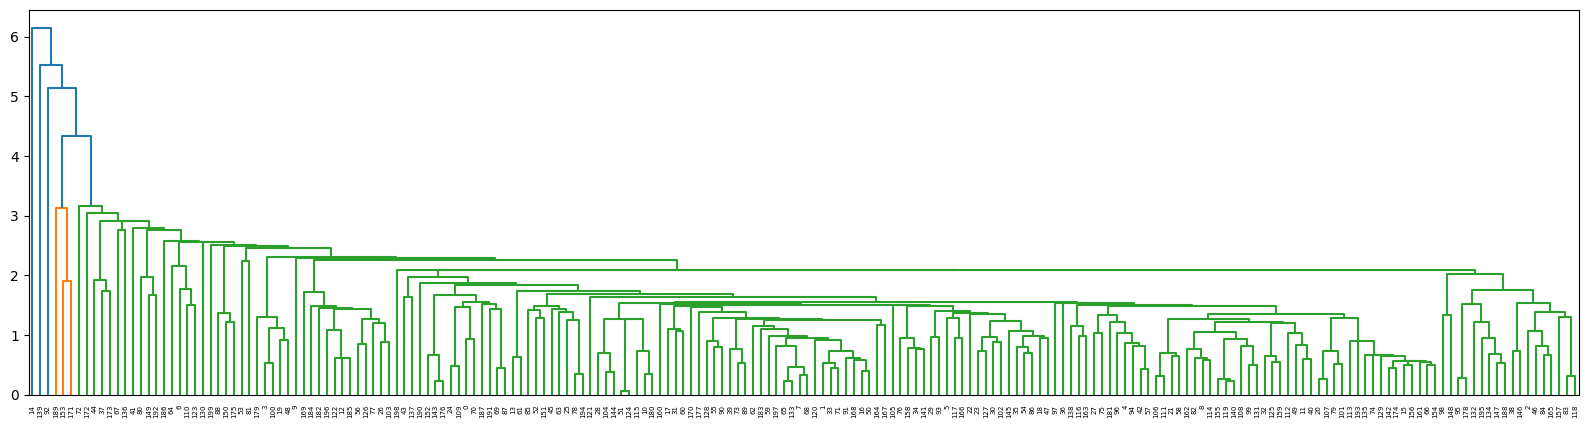

In [8]:
# Q: Show the dendrogram for Dataset #1 using single linkage (https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)
myLinkage = linkage(X1, method='single')    
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [11]:
# Q: Cut the dendrogram at the X height (distance) to obtain 2 clusters
labels = fcluster(myLinkage, t=5.75, criterion='distance')           
pd.Series(labels).value_counts()

1    199
2      1
Name: count, dtype: int64

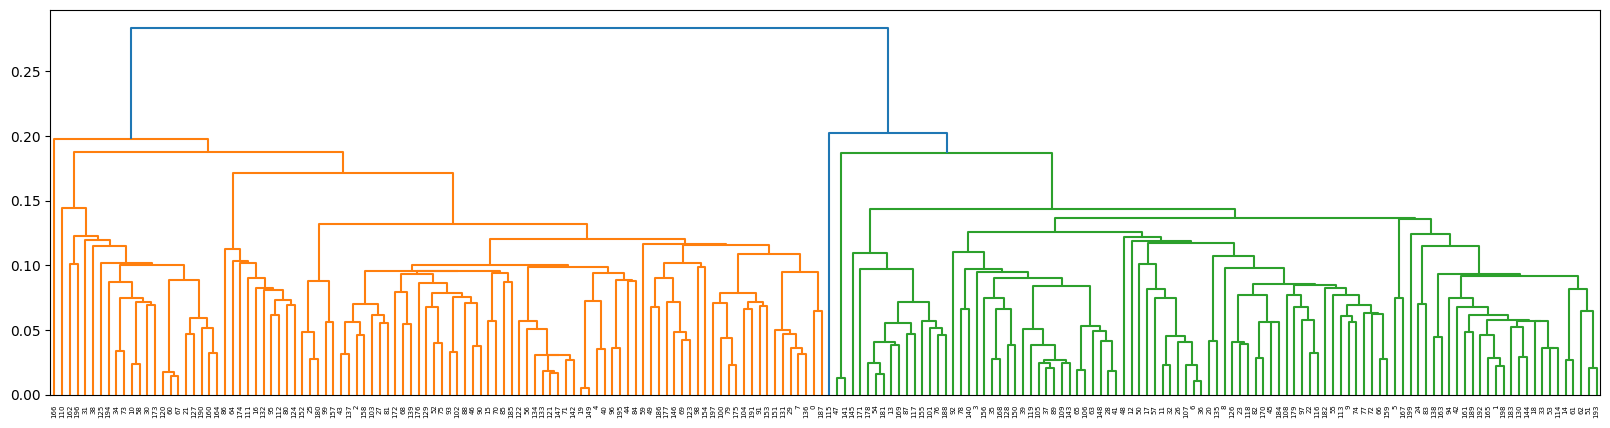

In [12]:
# Q: Show the dendrogram for Dataset #2 using single linkage (https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)
myLinkage = linkage(X2, method='single')    
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [13]:
# Q: Cut the dendrogram at the X height (distance) to obtain 2 clusters
labels = fcluster(myLinkage, t=0.25, criterion='distance')   
pd.Series(labels).value_counts()

1    100
2    100
Name: count, dtype: int64

#### 1.5. Apply DBSCAN and visualize: 

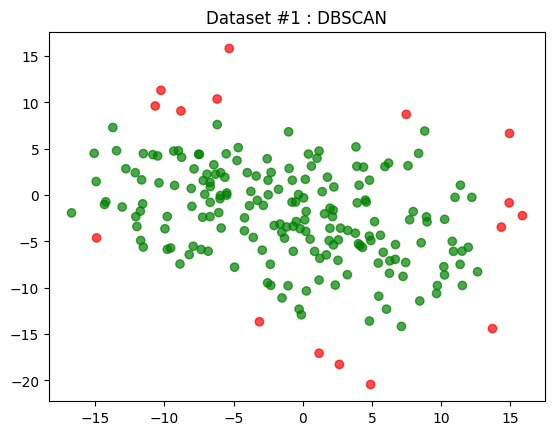

In [14]:
# Apply and fit DBSCAN (eps = 3 and min_samples = 5) to Dataset #1 (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
dbscan = DBSCAN(eps=3, min_samples=5)                  # DBSCAN object with eps=3 and min_samples=5.
dbscan.fit(X1)                                         # Unsupervised learning => Only X1.
myColors = {-1:'red',0:'green',1:'blue'}                                 # Define a color palette: -1~1.  Red = -1 = outlier.
plt.scatter(X1[:,0],X1[:,1], c= pd.Series(dbscan.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #1 : DBSCAN')
plt.show()

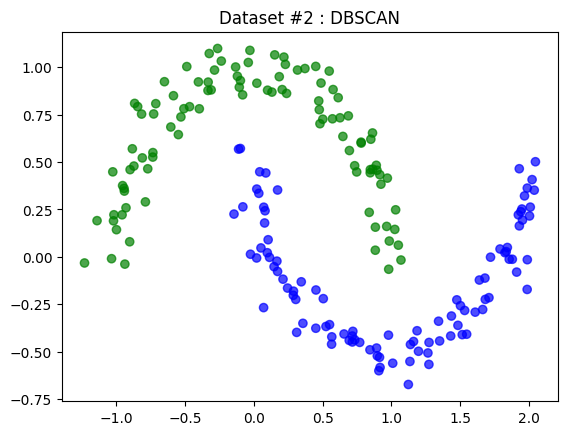

In [15]:
# Apply and fit DBSCAN (eps = 3 and min_samples = 5) to Dataset #2 (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
dbscan = DBSCAN(eps=0.25, min_samples=5)                  # DBSCAN object with eps=3 and min_samples=5.
dbscan.fit(X2)
myColors = {-1:'red',0:'green',1:'blue'}                                 # Define a color palette: -1~1. Red = -1 = outlier.
plt.scatter(X2[:,0],X2[:,1], c= pd.Series(dbscan.labels_).apply(lambda x: myColors[x]), alpha=0.7 )   
plt.title('Dataset #2 : DBSCAN')
plt.show()

Q: Discuss the result of the different clustering algorithms.